# Laboratorio di Simulazione Numerica

## Esercitazione 9

### Esercizio 9.1

Lo scopo dell'esercitazione è quello di creare un algoritmo genetico in grado di risolvere il problema del commesso viaggiatore (TSP). Questo è un ben noto problema che appartiene alla classe NP-Hard, in quanto non risolvibile in tempo polinomiale. Inoltre si dimostra che ogni altro problema NP può essere ricondotto in tempo polinomiale a questo particolare problema: da qui si ha che il TSP appartiene non solo alla classe NP, ma alla classe NP-Hard. Esso dunque rappresenta un quesito di notevole rilevanza.

La domanda che ci si pone è la seguente: dato un elenco di $n$ città che un commesso deve necessariamente visitare una sola volta e facendo in modo di terminare il suo percorso nella stessa città da cui l'ha iniziato, **qual è il percorso più breve da seguire per visitare tutte le città?**. Evidentemente, una volta fissate le condizioni al contorno (**una e una sola visita per città** e **percorso che termina nello stesso punto in cui inizia**), si tratta di un problema di minimizzazione. Un modo per risolverlo, con la forza bruta, sarebbe quello di assegnare ad ogni città un numero intero fra $1$ e $n$ e di pensare quindi ad un possibile percorso come un vettore $\vec{x}$ di numeri interi. Ad ogni vettore sarà assegnata una **funzione costo** scalare $L(\vec{x})$ che, dato il vettore $\vec{x}$, restituisce la lunghezza del percorso fatto visitando le città nell'ordine in cui compaiono nel vettore. A questo punto è evidente che il modo più facile di trovare il percorso più breve sarebbe quello di trovare tutti i possibili vettori $\vec{x}$ che soddisfano le condizioni al contorno, cioè tutte le possibili permutazioni delle $n$ città, e calcolare tutti i possibili $L(\vec{x})$ alla ricerca del più piccolo. Ma allora è chiaro che il problema non può avere un tempo di risoluzione che scali in modo polinomiale, dal momento che le permutazioni di $n$ interi sono $n!$, che, per $n$ anche solo superiori a 10, è un numero estremamente grande.

Quando si tratta di problemi NP-Hard, non esiste un modo sistematico per risolverli. In questa esercitazione si richiede di affrontare il problema del commesso viaggiatore per $n_{città} = 32$ tramite un **algoritmo genetico**. Esso prende esempio dal meccanismo di selezione naturale per cercare di far emergere, a partire da una popolazione eterogenea, gli individui "migliori" che soddisfano particolari richieste. Nel nostro caso, vogliamo generare tanti vettori di interi, ciascuno rappresentante un possibile percorso e **fare in modo che**, tramite un algoritmo di selezione naturale, **sopravvivano solo quei vettori che garantiscono i percorsi più brevi**. Cercheremo poi di fare in modo che questi individui migliori propaghino le proprie caratteristiche ottimali alle generazioni successive.

L'idea è quindi quella di partire da una **popolazione ordinata generata randomicamente** di $N$ ($N >> n$) vettori che contengono interi fra $1$ e $32$ distribuiti in modo casuale. Ogni individuo della popolazione sarà etichettato da un intero che identifica la sua posizione all'interno della popolazione. Le uniche condizioni da soddisfare sono che la **prima città sia sempre $1$** e che **ogni intero compaia sempre una e una sola volta** in ogni vettore. In questo modo gli $N$ vettori rappresentano $N$ possibili percorsi che il commesso può seguire.

Una volta generata la popolazione, è necessario implementare la funzione di costo $L(\vec{x})$. Questa è stata scelta come la somma delle norme quadratiche delle distanze fra le città, definita come segue: 
$$
L(\vec{x}) = \big(\sum_{i=1}^{31}|x_{i+1} - x_{i}|^2\big) + |x_{32} - x_{1}|^2
$$
Per farlo si è scelto di generare una matrice $M$ di dimensione $n \times n$ che abbia alla posizione $(i, j)$ la norma quadratica della distanza fra la città $i$ e la città $j$. Questa sarà dunque una **matrice simmetrica con tutti zeri sulla diagonale** (ogni città dista 0 da se stessa). A questo punto per calcolare $L(\vec{x})$ è necessario semplicemente sommare gli elementi di matrice nell'ordine in cui compaiono gli interi nel vettore $\vec{x}$. Ad esempio per $n = 5$:

$$
\vec{x} = (1, 3, 2, 5, 4) \rightarrow L(\vec{x}) = M[1][3] + M[3][2] + M[2][5] + M[5][4] + M[4][1]
$$

Una caratteristica importante della funzione costo è che deve tenere conto della condizione al contorno per la quale è necessario tornare alla città di partenza. Quindi l'ultimo addendo di $L(\vec{x})$ sarà sempre la distanza fra **l'ultima città del vettore $\vec{x}$ e la città $1$**.

A questo punto abbiamo bisogno di un algoritmo di **selezione** che faccia sì che gli individui che garantiscono percorsi più brevi possano accedere alla fase di riproduzione e tramandino le proprie caratteristiche alle generazioni future. Per fare ciò prima di tutto si è creato un **algoritmo di sorting** (Fitness_sort) il quale ordinasse gli $N$ elementi della popolazione, a partire da quelli con percorso più breve fino a quelli con percorso più lungo. In questo modo i primi individui della popolazione, dopo aver applicato l'algoritmo di sorting, sono i migliori che garantiscono percorsi brevi. A questo punto quindi vogliamo che l'algoritmo di selezione estragga un numero fra $1$ e $N$ e che questo numero sia il più possibile vicino a 1, in modo che gli individui selezionati siano fra i primi della popolazione, e quindi fra i migliori possibili. Questo numero è estratto con l'algoritmo $j=N\times int(r^p)$, con $r$ un numero generato uniformemente fra $0$ e $1$ e $p$ un esponente scelto convenientemente. Per gli esercizi successivi si è preso $p = 3$.

Una volta che abbiamo l'algoritmo di selezione, implementiamo un algoritmo che, a partire da due vettori $\vec{x_1}$ e $\vec{x_2}$ (che rappresentano i genitori) restituisca due nuovi vettori $\vec{y_1}$ e $\vec{y_2}$ (che rappresentano i figli). Per farlo prendiamo ancora esempio dalla natura: dopo aver selezionato i due genitori fra i migliori della popolazione, eseguiamo un **cross-over** fra i due con probabilità $p_c$, ossia facciamo in modo che i genitori si combinino fra loro per dare figli che hanno caratteristiche simili alle loro ma con qualche differenza che potrebbe generare individui ancora migliori per il nostro scopo. Il tipo di cross-over eseguito nel codice estrae in modo randomico un punto in cui eseguire il crossover: prima di questo punto il vettore figlio è uguale al vettore madre, da dopo questo punto gli interi nel figlio devono comparire nello stesso ordine nel quale compaiono nell'altro genitore. Evidentemente, se non avviene un crossover i figli generati in questa fase sono uguali ai genitori.

Infine, sempre prendendo esempio dalla natura, eseguiamo alcune mutazioni randomiche che possono avvenire sui vettori con probabilità $p_i$. Le mutazioni scelte sono:
- **Inversione** dell'ordine in cui compaiono $m < n$ elementi del vettore: il numero $m$ di elementi da invertire è estratto casualmente, così come il punto di inizio dell'inversione;
- **Permutazione di coppia** di due elementi del vettore estratti casualmente;
- **Permutazione di $m < n$ elementi** del vettore: il numero $m$ di elementi da permutare è estratto casualmente.

Ripetiamo queste operazioni fino a quando non abbiamo generato $N$ nuovi individui, che formano quindi una nuova popolazione, a partire dai vecchi individui. Tutto questo (crossover + mutazioni) viene eseguito nel codice dalla funzione **Populate**.

Inoltre segnaliamo che, durante la scrittura e la compilazione del codice, si è sfruttata la funzione **Check** che controllasse che tutti i vettori generati nelle diverse fasi del codice soddisfassero le condizioni al contorno, ossia che il primo numero di ogni vettore fosse sempre $1$ e che ogni numero comparisse una e una sola volta in ogni vettore.

A questo punto siamo pronti a presentare i risultati. L'algoritmo è stato applicato a due situazioni iniziali, la prima in cui le città del percorso erano distribuite casualmente su una circonferenza, la seconda in cui erano distribuite casualmente all'interno di un quadrato. Di seguito si riportano il **percorso iniziale generato randomicamente** e il **percorso ottimale trovato dall'algoritmo alla fine della simulazione**. Inoltre, si riporta un plot che mostra l'**andamento della lunghezza media del percorso, fatta sulla migliore metà della popolazione**. Si mostra anche un plot dell'andamento della **lunghezza dell'elemento migliore della popolazione**.

Si segnala che per risolvere il problema con $n = 32$ città si è utilizzata una popolazione di $N = 600$ individui. Per quanto riguarda le probabilità coinvolte nella funzione Populate, per il caso del cerchio si è posta la probbilità di crossover pari a $p_c = 75\%$ mentre le probabilità di avere mutazioni pari a $p_i = 15\%$, per il caso del quadrato si è posto $p_c = 75\%$ e $p_i = 30\%$.

#### Città lungo un cerchio

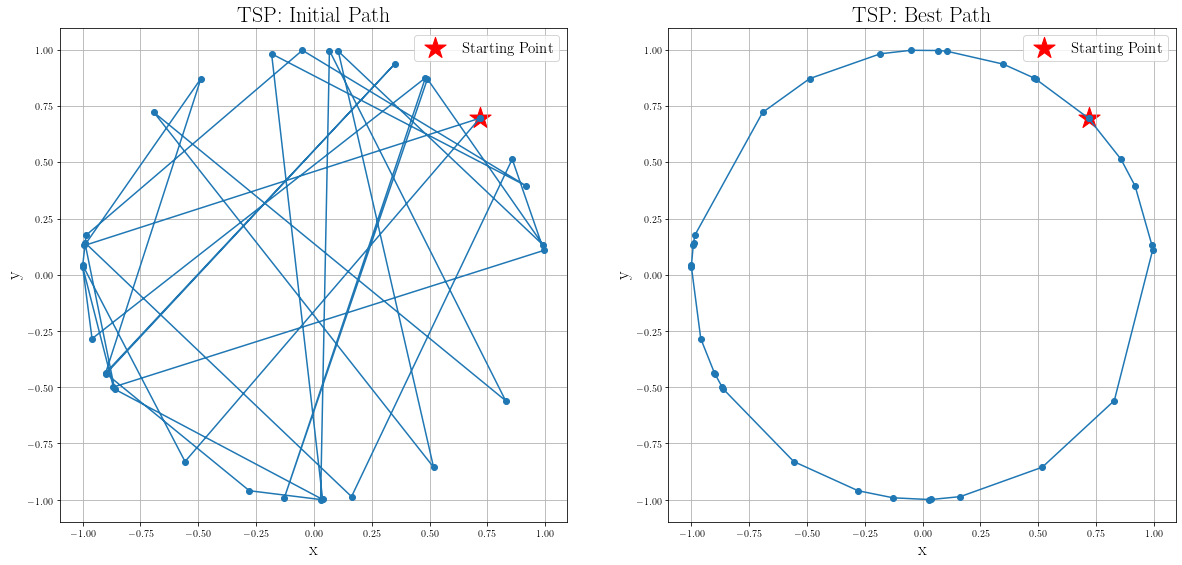

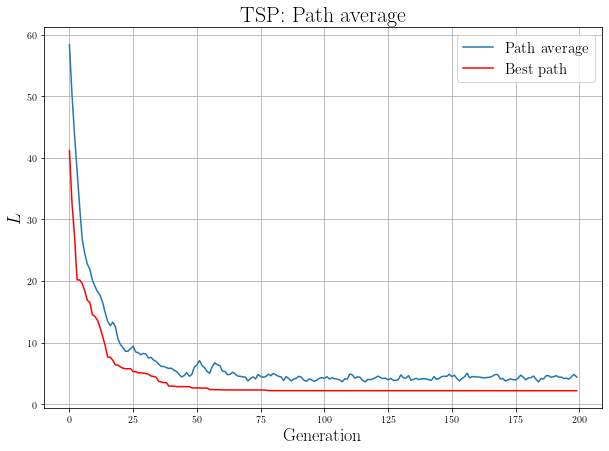

Percorso medio iniziale =  58.3439
Percorso medio dopo 50 ripetizioni =  6.04499
Percorso medio dopo 100 ripetizioni =  4.31778
Percorso medio dopo 200 ripetizioni =  4.39628
Percorso migliore =  2.20158


In [2]:
import matplotlib as mlab
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

x1 = np.loadtxt("Route_0", unpack='true', usecols=0)
y1 = np.loadtxt("Route_0", unpack='true', usecols=1)
x2 = np.loadtxt("Route_200", unpack='true', usecols=0)
y2 = np.loadtxt("Route_200", unpack='true', usecols=1)

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(221)   #top left
plt.plot(x1, y1, marker='o')
plt.scatter(x1[0], y1[0], c='r', marker='*', s=500, label='Starting Point')
plt.title('TSP: Initial Path', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)

fig.add_subplot(222)  #top right
plt.plot(x2, y2, marker='o')
plt.scatter(x1[0], y1[0], c='r', marker='*', s=500, label='Starting Point')
plt.title('TSP: Best Path', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)

x3 = np.arange(200)
y3 = np.loadtxt("Media", unpack='true')
y4 = np.loadtxt("Media_migliore", unpack='true')

plt.figure(figsize=(10,7))
plt.plot(x3, y3, label='Path average')
plt.plot(x3, y4, c='r', label='Best path')
plt.legend(loc='best', fontsize=15)
plt.title('TSP: Path average', fontsize=22)
plt.xlabel('Generation', fontsize=18)
plt.ylabel('$L$', fontsize=18)
plt.grid(True)

plt.show();

print('Percorso medio iniziale = ', y3[0])
print('Percorso medio dopo 50 ripetizioni = ', y3[49])
print('Percorso medio dopo 100 ripetizioni = ', y3[99])
print('Percorso medio dopo 200 ripetizioni = ', y3[-1])
print('Percorso migliore = ', y4[-1])

#### Città dentro un quadrato 

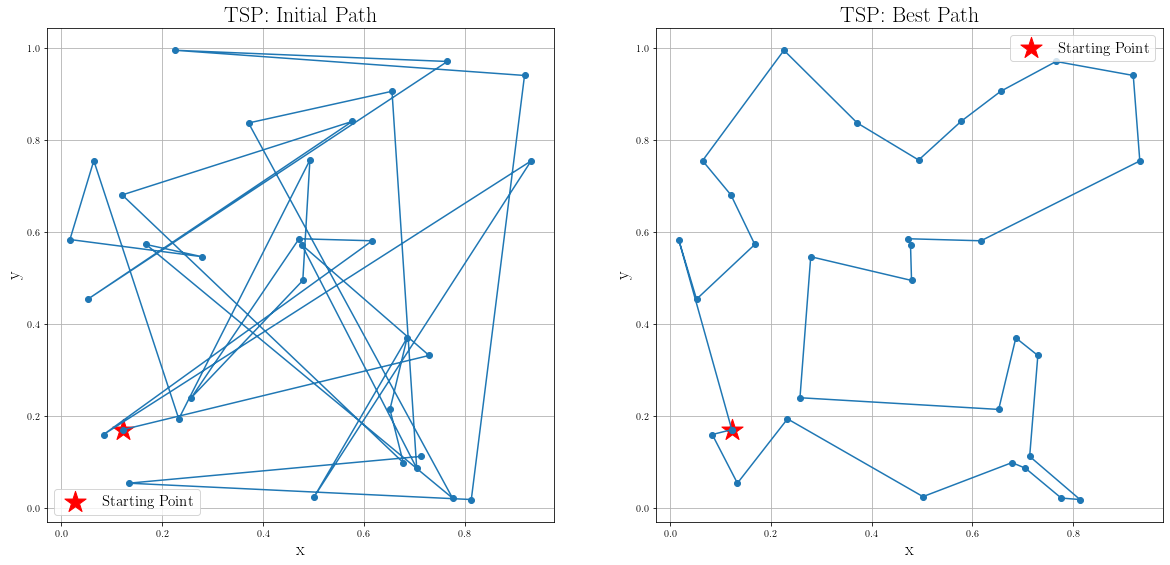

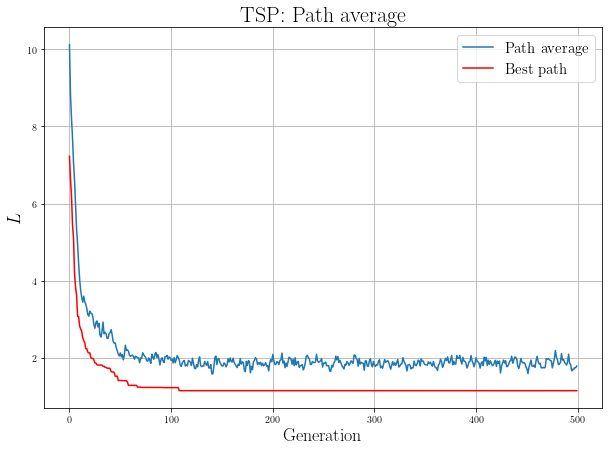

Percorso medio iniziale =  10.1194
Percorso medio dopo 50 ripetizioni =  2.04531
Percorso medio dopo 100 ripetizioni =  2.00265
Percorso medio dopo 250 ripetizioni =  1.75645
Percorso medio dopo 500 ripetizioni =  1.78336
Percorso migliore =  1.14356


In [3]:
import matplotlib as mlab
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

x1 = np.loadtxt("Route_quad_0", unpack='true', usecols=0)
y1 = np.loadtxt("Route_quad_0", unpack='true', usecols=1)
x2 = np.loadtxt("Route_quad_500", unpack='true', usecols=0)
y2 = np.loadtxt("Route_quad_500", unpack='true', usecols=1)
y3 = np.loadtxt("Media_quad", unpack='true')
x3 = np.arange(y3.size)
y4 = np.loadtxt("Media_quad_migliore", unpack='true')

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(221)   #top left
plt.plot(x1, y1, marker='o')
plt.scatter(x1[0], y1[0], c='r', marker='*', s=500, label='Starting Point')
plt.title('TSP: Initial Path', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)

fig.add_subplot(222)  #top right
plt.plot(x2, y2, marker='o')
plt.scatter(x1[0], y1[0], c='r', marker='*', s=500, label='Starting Point')
plt.title('TSP: Best Path', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)

plt.figure(figsize=(10,7))
plt.plot(x3, y3, label='Path average')
plt.plot(x3, y4, c='r', label='Best path')
plt.legend(loc='best', fontsize=15)
plt.title('TSP: Path average', fontsize=22)
plt.xlabel('Generation', fontsize=18)
plt.ylabel('$L$', fontsize=18)
plt.grid(True)

plt.show()

print('Percorso medio iniziale = ', y3[0])
print('Percorso medio dopo 50 ripetizioni = ', y3[49])
print('Percorso medio dopo 100 ripetizioni = ', y3[99])
print('Percorso medio dopo 250 ripetizioni = ', y3[249])
print('Percorso medio dopo 500 ripetizioni = ', y3[-1])
print('Percorso migliore = ', y4[-1])

In entrambi i casi l'algoritmo sembra riuscire a risolvere il problema. Possiamo notare come nel caso del cerchio il valore medio del percorso converga ad un valore minimo già prima delle 100 ripetizioni, mentre nel caso del quadrato occorrono quasi 200 ripetizioni dell'algoritmo. Si segnala, tuttavia, come in entrambi i casi il migliore individuo della popolazione rappresenta il miglior percorso già dopo 100 ripetizioni dell'algoritmo genetico.